## I) Introduction

This program can be used to evaluate the network growth over time based on a linkage graph. Please read the chapter **I) Introduction** completely before you start running the program in the Jupyter Notebook.

**The program consists of three sections:** 
- Section *I) Introduction* provides a brief overview of the program and its use. 
- Section *II) Program* contains the programming implementation. This in turn is divided into the import of the required libraries, the definition of the sub-methods and the execution of the main method.
- Within section "III) Program execution" the user chooses the relevant files with cypher noded and the cyper edges, the graph's center as a starting point and the location for the output file to be saved. With the execution of the main method the network growth is calculated and the results are stored within a text file within the specified directory.

**Process description:**
 > First, all lines of code in chapter "II Program" must be executed. After that in chapter "III) Program execution" the project name for the with the program *1_Program_Creation_Linkage_Graph* created project has to be provided.

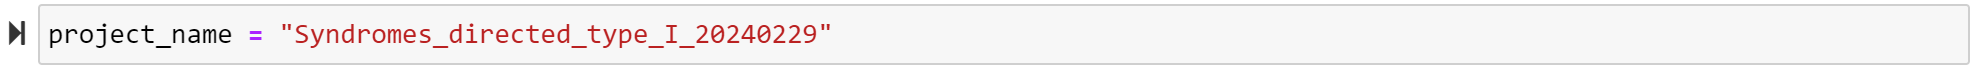

> Subsequently the type of the linkage graph which has been created within the called project has to be selected 

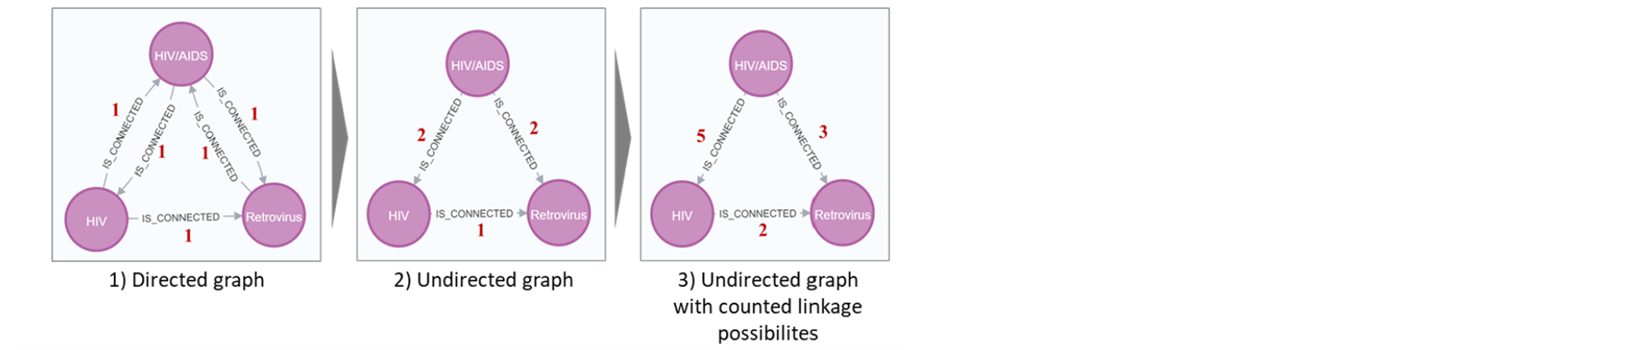

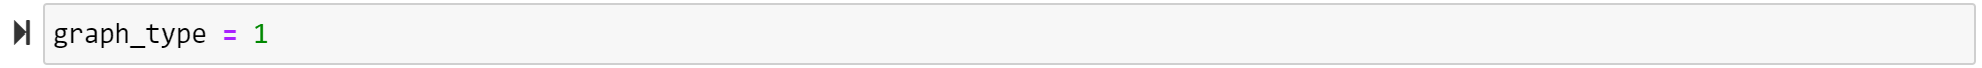

> After choosing the graph type, enter the title of the node from which the network growth is to be calculated.

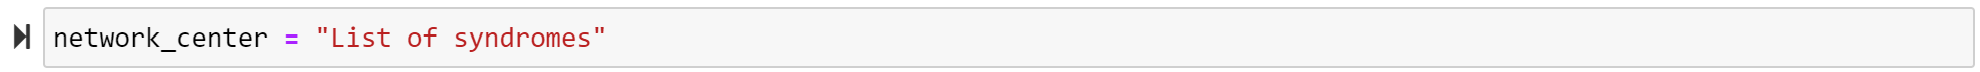

> As the last step execute the main method in order to calculate the network growth - the execution of the method can take some time.

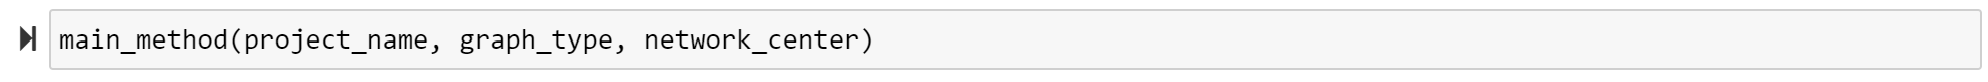

> After the program execution is finished, you'll find the folder *3_Network_growth* in the selected project directory within the user's directory (C/User/Username/...).

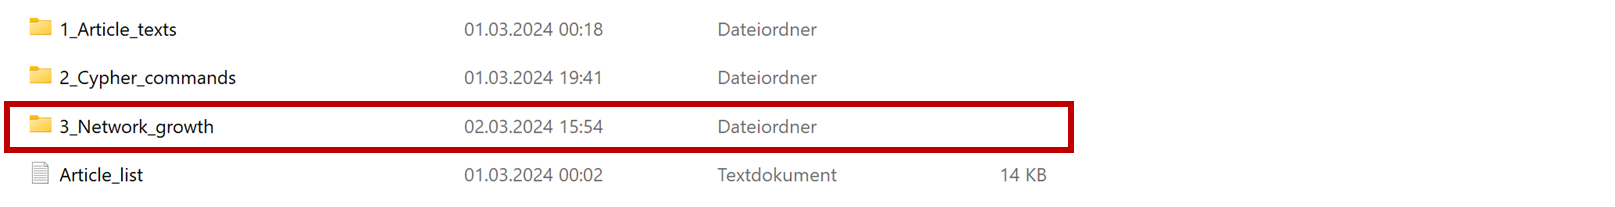

> You'll find the documented network growth within the file 3_Network_growth/Network_growth.

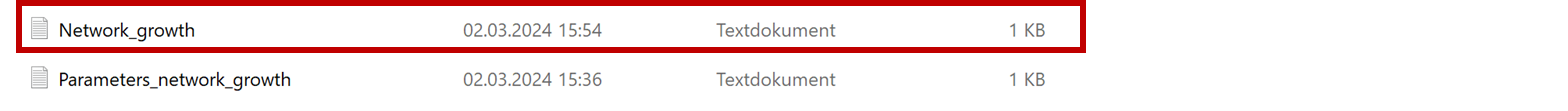

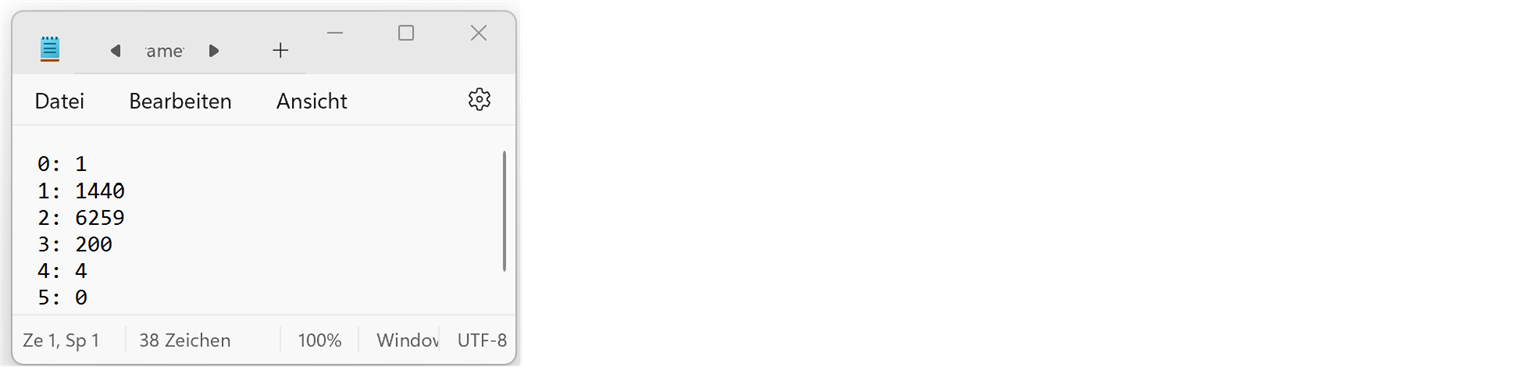

## II) Program

#### 1) Import libraries

In [1]:
import requests
import csv
import re
import os
from json import dumps

#### 2) Method definition 

In [2]:
def read_article_list(project_name):
    # Reads article file from project directory and returs string
    
    # params: Project name as string
    # returns: Article titles as String
    # rtype: String
      
    # Generate file path
    user_path = os.path.expanduser('~')
    path = os.path.join(user_path, project_name)
    full_path = path + "\Article_list.txt"
    
    try:
        with open(full_path, 'r', encoding='utf-8') as file:
            content = file.read()
        return content
    except FileNotFoundError:
        print(f"The file hasn't been found")
        
        return text_string

In [3]:
def extract_values(string):
    # Extraction of article titles from string
    
    # params: Article titles as string
    # returns: article titles as list
    # rtype: List
    
    string = string.strip('"\n')
    values = string.split('","')
    
    # Split entries and remove " from values
    cleaned_values = [value.strip('"') for value in values]
    return cleaned_values

In [4]:
def read_article_text(file_name, folder_path):
    # Extraction of article text from text file within project folder 
    
    # params: File name as string
    # returns: Text within file
    # rtype: String
    
    # Check if article title contains "/" - if so replace it with "_"
    if "/" in file_name:
        file_name = file_name.replace("/", "_")
        
    # Check if article title contains "," - if so replace it with "_"
    if "," in file_name:
        file_name = file_name.replace(",", "_")
    
    # Define file path incl. ending .txt
    file_path = os.path.join(folder_path, file_name)
    file_path += ".txt"

    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            content = file.read()
        return content
    else:
        print(f"The file '{file_name}' hasn't been found within '{folder_path}'.")
        return ""

In [5]:
def remove_references(string):
    # Deleting references, appendix, etc. from article text
    
    # params: Text as string
    # returns: Text
    # rtype: String
    
    # Define patterns to be removed within string
    pattern_one = r"<ref>.*?</ref>"
    pattern_two = r"<ref name=.*?</ref>"
    pattern_three = r"File:.*?.jpg"
    pattern_four = r"Category:.*?"
    pattern_five = r"\\.*?"
    pattern_six = r"Help:List.*?"
    pattern_seven = r"wikt:.*?"
    
    # Order and application of patterns
    red_string = re.sub(pattern_two, "", 
                        re.sub(pattern_one, "", 
                               re.sub(pattern_three, "", 
                                      re.sub(pattern_four, "", 
                                            re.sub(pattern_five, "", 
                                                   re.sub(pattern_six, "", 
                                                         re.sub(pattern_seven, "", string)))))))
    
    # Additionally remove reference list
    result = red_string[0:red_string.find("{{Refbegin}}")]
    
    return result

In [6]:
def clean_special_characters(input_string):
    # Cleaning/Replacing undesired combination of characters within the string
    
    # params: Text as string
    # returns: Text
    # rtype: String
    
    # Define the characters and strings to be replaced
    formatted_string = input_string.replace('"\n', '') # relevant to avoid problem with "Twiddler's syndrome"
    formatted_string = formatted_string.replace("\\\\", "")
    formatted_string = formatted_string.replace("u2013", "-")
    formatted_string = formatted_string.replace("u00f6", "ö")
    formatted_string = formatted_string.replace("00fc", "ü")  
    formatted_string = formatted_string.replace("u00e4", "ä")  
    formatted_string = formatted_string.replace("u00fc", "ü")
    formatted_string = formatted_string.replace("u00e9", "é")
    formatted_string = formatted_string.replace("u00e2", "â")
    formatted_string = formatted_string.replace("u00e8", "è")
    formatted_string = formatted_string.replace("u00e0", "à")
    formatted_string = formatted_string.replace("u00f3", "ó")
    formatted_string = formatted_string.replace("u00e1", "á")
    formatted_string = formatted_string.replace("u00f8", "ø")
    formatted_string = formatted_string.replace('"', '')
    
    return formatted_string

In [7]:
def remove_exceptions(input_list, exception_list):
    # Removing defined entries from an input list - can be used do remove exception from list
    
    # params: Defined exceptions as  a list
    # returns: List without defined exceptions
    # rtype: List
    
    # Remove entries from list
    output_list = [item for item in input_list if item not in exception_list]
    
    return output_list

In [8]:
def extract_links(string):
    # Extraction of links from article text and returns a list of strings
    
    # params: Article text as string
    # returns: Internal links within the article text
    # rtype: ListI
    
    result = []
    
    # Links within Wikipedia articles are marked by '[[...]]'
    start = string.find("[[")
    while start != -1:
        end = string.find("]]", start + 1)
        if end == -1:
            break
        
        # Check if it is a masked link
        linked_content = string[start + 2:end]
        
        
        # If masked link - remove second part from string (from '|' on)
        if '|' in linked_content:
            linked_content = linked_content[:linked_content.find("|")]
        
        # If reference to specific chapter - remove second part from string (from '#' on)
        if "#" in linked_content:
            linked_content = linked_content[:linked_content.find("#")]
            
        # If extracted links contains 'ile:' - remove it
        if "ile:" in linked_content:
            linked_content = ""
            
        # If extracted links contains 'mage:' - remove it
        if "mage:" in linked_content:
            linked_content = ""
        
        result.append(linked_content)
        start = string.find("[[", end + 1)
        
        result = remove_exceptions(result, ["n "])
        
    return result

In [9]:
def remove_empty_entries(entry_list):
    # Removal of empty entries from a list and returns a list
    
    # params: Input as list
    # returns: List without empty entries
    # rtype: List
    
    try:
        while True:
            entry_list.remove("")
            
    except ValueError:
        pass
    
    return entry_list

In [10]:
def clean_multiple_entries(entry_list):
    # Cleaning multiple entries within the nodes - a node is unique within the linkage graph
    
    # params: Potential graph nodes as list
    # returns: Nodes without duplicates
    # rtype: List
    
    # Transform list into a set and then back into a list
    unique_list = list(set(entry_list))
    
    return unique_list

In [11]:
def extract_nodes_from_article_list(articles_list, project_name):
    # Extraction of nodes from all articles within the defined article list and folder
    
    # params: List with article titles
    # returns: Unique nodes within all articles
    # rtype: List
    
    nodes = []
    
    # Identify project path and folder
    user_path = os.path.expanduser('~')
    path = os.path.join(user_path, project_name)
    full_path = path + "\\1_Article_texts" + "\\"
    
    # Iterate over article list
    for article in articles_list:
        
        # Add the original article titel -> cleaned
        nodes.append(clean_special_characters(article))
        
        # Read article text from txt file in folder
        article_text = read_article_text(article, full_path)

        # Remove references
        text_without_references = remove_references(article_text)

        # Clean special characters in string
        text_cleaned = clean_special_characters(text_without_references)

        # Extract links from text
        text_links = extract_links(text_cleaned)

        # add extracted links zu nodes list
        nodes.extend(text_links)
    
    # Clean multiple entries -> each node is unique
    nodes_cleaned = clean_multiple_entries(nodes)
    
    # Remove empty entries within list
    nodes_cleaned_without_empty_entries = remove_empty_entries(nodes_cleaned)
    
    # Remove duplicate variable declarations
    nodes_cleaned_no_duplicates = remove_duplicate_variables(nodes_cleaned_without_empty_entries)
    
    # Remove exception: entry 
    
    return nodes_cleaned_no_duplicates

In [12]:
def convert_to_neo4j_variable(string):
    # Convertion of extracted link to neo4j variable
    
    # params: Article tile as string
    # returns: article title as neo4j variable
    # rtype: String
    
    # Replace all characters not admitted for variable name
    cleaned_string = re.sub(r'[^a-zA-Z0-9_]', '_', string)
    
    # If first letter is a digit, add "_"
    if cleaned_string[0].isdigit():
        cleaned_string = '_' + cleaned_string
    
    # Change capital letters wihin variable name
    cleaned_string = cleaned_string.lower() 
    
    return cleaned_string

In [13]:
def remove_duplicate_variables(string_list):
    # Method that removes variables which are not unique within list and returns a list of unique entris
    # -> A link declaration could be "Disease" or "disease" by deriving the same neo4j variable only a single node
    # is created within the linkage graph
    
    string_dict = {}
    
    # Create dict entry with neo4j variable as key and extracted link as value
    for string in string_list:
        key = convert_to_neo4j_variable(string)
        value = string
        
        # Check if key exists already in dict
        if key not in string_dict:
            string_dict[key] = value
    
    unique_values = list(string_dict.values())
    
    return unique_values

In [14]:
def extract_directed_edges_from_article_list(articles_list, project_name):
    # Extraction of all edges from all articles within the article selection and folder
    
    # params: List with article titles, project name as string
    # returns: Unqique edges (key) and according weights (value)
    # rtype: Dictionary
    
    entries_list = []
    edges = {}
    
    # Identify project path and folder
    user_path = os.path.expanduser('~')
    path = os.path.join(user_path, project_name)
    full_path = path + "\\1_Article_texts" + "\\"
    
    # Iterate over article list
    for article in articles_list:
        
        # Convert article to neo4j-variable
        node_1 = convert_to_neo4j_variable(article)
        
        # Read article text from txt file in folder
        article_text = read_article_text(article, full_path)

        # Remove references
        text_without_references = remove_references(article_text)

        # Clean special characters in string
        text_cleaned = clean_special_characters(text_without_references)

        # Extract links from text
        text_links = extract_links(text_cleaned)

        # Remove empty entries within list
        text_links_cleaned = remove_empty_entries(text_links)
        
        # Create a list with the links as neo4j-variables
        for link in text_links_cleaned:
            
            #Save the edge within a string
            node_2 = convert_to_neo4j_variable(link)
            relation = str(node_1 + "|" + node_2)
            entries_list.append(relation)
    
    # Create unique list and count the frequency of an entry
    entries_list_unique = clean_multiple_entries(entries_list)
    
    # Iterate over list with unique entries
    for entry in entries_list_unique:
        
        # Count number of unique entries in entries_list
        weight = entries_list.count(entry)
        
        # Save number of entries within dictionary
        edges[entry] = weight
        
    return edges

In [15]:
def merge_symmetric_keys(dictionary):
    # Checking if input dictionary contains symmetric key - if so it summing up the values and removes the symmetric key
    
    # params: Edges (key) and weights (value) as dictionary
    # returns: Edges and weights without summed up and deleted symmetric keys
    # rtype: Dictionary
    
    keys_to_remove = []
    
    # Iterate over dictionary and build reverse keys
    for key in dictionary:
        if '|' in key:
            parts = key.split('|')
            reverse_key = f"{parts[1]}|{parts[0]}"
            
            # Check if there is a reverse key within the dicitonary
            if reverse_key in dictionary:
                dictionary[key] += dictionary[reverse_key]
                
                if key not in keys_to_remove:
                    keys_to_remove.append(reverse_key)
    
    # Remove reverse keys from the dictionary
    for key in keys_to_remove:
        del dictionary[key]

In [16]:
def extract_undirected_edges_from_article_list(articles_list, project_name):
    # Extraction of all edges from all articles within the defined article list and folder
    
    # params: Article titles as list, project as string
    # returns: Unqique edges (key) and according weights (value)
    # rtype: Dictionary
    
    entries_list = []
    edges = {}
    
    # Identify project path and folder
    user_path = os.path.expanduser('~')
    path = os.path.join(user_path, project_name)
    full_path = path + "\\1_Article_texts" + "\\"
    
    # Iterate over article list
    for article in articles_list:
        
        # Convert article to neo4j-variable
        node_1 = convert_to_neo4j_variable(article)
        
        # Read article text from txt file in folder
        article_text = read_article_text(article, full_path)

        # Remove references
        text_without_references = remove_references(article_text)

        # Clean special characters in string
        text_cleaned = clean_special_characters(text_without_references)

        # Extract links from text
        text_links = extract_links(text_cleaned)

        # Remove empty entries within list
        text_links_cleaned = remove_empty_entries(text_links)
        
        # Create a list with the links as neo4j-variables
        for link in text_links_cleaned:
            
            #Save the edge within a string
            node_2 = convert_to_neo4j_variable(link)
            relation = str(node_1 + "|" + node_2)
            entries_list.append(relation)
    
    # Create unique list and count the frequency of an entry
    entries_list_unique = clean_multiple_entries(entries_list)
    
    # Iterate over list with unique entries
    for entry in entries_list_unique:
        
        # Count number of unique entries in entries_list
        weight = entries_list.count(entry)
        
        # Save number of entries within dictionary
        edges[entry] = weight
        
    # Add up values and remove symmetric keys
    merge_symmetric_keys(edges)
        
    return edges

----

In [17]:
def extract_keys_to_list(edges_dictionary):
    # Transformation of all keys within a dictionary to a list
    
    # params: Edges (key) as dictionary
    # returns: Edges as list
    # rtype: List
    
    return list(edges_dictionary.keys())

In [18]:
def change_nodes_to_neo4j_variables(nodes_list):
    # Convertion of nodes to neo4j variables
    
    # params: Nodes as list
    # returns: neo4j variables for nodes as list
    # rtype: List
   
    
    nodes_converted = []
    
    # Iterate over nodes list
    for node in nodes_list:
        node = convert_to_neo4j_variable(node)
        
        nodes_converted.append(node)
    
    return nodes_converted

In [19]:
def evaluate_network_growth_over_time_directed(network_center, nodes_list, edges_list):
    # Calculation of network growth for a directed network from the graph's center
    
    # params: Network center as string, nodes_list as list, edges_list as list
    # returns: Time steps (keys) and number of nodes (values) for network growth as dictionary
    # rtype: Dictionary
    
    network_growth = {}
    relevant_nodes_set = {convert_to_neo4j_variable(network_center)}
    edges_set = set(extract_keys_to_list(edges_list))
    nodes_set = set(change_nodes_to_neo4j_variables(nodes_list))
    i = 1
    
    # Calculate t[0]
    network_growth[0] = len(nodes_set)-len(nodes_set - relevant_nodes_set)
    print("time[0]:", network_growth[0])
    nodes_set.remove(convert_to_neo4j_variable(network_center))

    # Calculate time[1] to time [x]
    while network_growth[i-1] > 0: # Perform loop while network is still growing
        
        # Make sure, that only edges directed from reached nodes are selected 
        relevant_nodes_set = {label + '|' for label in relevant_nodes_set}
        
         # Choose relevant edges within the time step
        filtered_list = {entry2 for entry1 in relevant_nodes_set for entry2 in edges_set if entry1 in entry2}

         # Extract relevant nodes for time step from relevant edges
        processed_list = {entry.replace(entry1, '').replace('|', '') for entry1 in relevant_nodes_set for entry in filtered_list}
        
        # Create set with remaining nodes for calculation of network growth
        nodes_set_new = nodes_set - processed_list
        
        # Calculate network growth for time step
        network_growth[i] = len(nodes_set)-len(nodes_set_new)
        print(f"time[{i}]: {network_growth[i]}")
        
        # Remove relevant nodes for time step from set with remaining nodes
        nodes_set -= processed_list

        # Update set of nodes which have been reached within the round for the next iteration
        relevant_nodes_set = processed_list
        
        # Increase counter variable
        i+=1

    return network_growth

In [20]:
def evaluate_network_growth_over_time_undirected(network_center, nodes_list, edges_list):
        # Calculation of network growth for a undirected network from the graph's center
    
    # params: Network center as string, nodes_list as list, edges_list as list
    # returns: Time steps (keys) and number of nodes (values) for network growth as dictionary
    # rtype: Dictionary
    
    network_growth = {}
    relevant_nodes_set = {convert_to_neo4j_variable(network_center)}
    edges_set = set(extract_keys_to_list(edges_list))
    nodes_set = set(change_nodes_to_neo4j_variables(nodes_list))
    i = 1
    
    # Calculate t[0]
    network_growth[0] = len(nodes_set)-len(nodes_set - relevant_nodes_set)
    print("time[0]:", network_growth[0])
    nodes_set.remove(convert_to_neo4j_variable(network_center))

    # Calculate time[1] to time [x]
    while network_growth[i-1] > 0: # Perform loop while network is still growing
        
        # Choose relevant edges within the time step
        filtered_list = {entry2 for entry1 in relevant_nodes_set for entry2 in edges_set if entry1 in entry2}

        # Extract relevant nodes for time step from relevant edges
        processed_list = {entry.replace(entry1, '').replace('|', '') for entry1 in relevant_nodes_set for entry in filtered_list}

        # Create set with remaining nodes for calculation of network growth
        nodes_set_new = nodes_set - processed_list
        
        # Calculate network growth for time step
        network_growth[i] = len(nodes_set)-len(nodes_set_new)
        print(f"time[{i}]: {network_growth[i]}")
        
        # Remove relevant nodes for time step from set with remaining nodes
        nodes_set -= processed_list

        # Update set of nodes which have been reached within the round for the next iteration
        relevant_nodes_set = processed_list
       
        # Increase counter variable
        i+=1

    return network_growth

In [21]:
def save_data(data_string, project_name, file_name):         
    # Saving a string as a text file with a defined name
    
    # params: Input as string
    # returns: Output file
    # rtype: txt.-file, message
    
    # Generate project path and folder
    user_path = os.path.expanduser('~')
    path = os.path.join(user_path, project_name)
    full_path = path + "\\3_Network_growth"
    
    # Check if folder exists - if not create new folder
    if not os.path.exists(full_path):
        os.makedirs(full_path)
    
    try:
        with open(full_path + "\\" + file_name, 'w') as data:
            data.write(data_string)
        print("--> File '" + file_name + "' has successfully been created")
        
    except IOError:
        print("Error occurred whlile trying to create file " + file_name)

In [22]:
def dictionary_to_string(dictionary):
    # Converting a dictionary to a string in order to be stored within a textfile
    
    # params: Dictionary as dictionary
    # returns: Result as string
    # rtype: String
    
    result = ""
    for key, value in dictionary.items():
        result += f"{key}: {value}\n"
    return result

### MAIN METHODE

In [23]:
def main_method(project_name, graph_type, center):
     # Calling all relevant sub methods in order to calculate network growth
    
    # params: project_name as string, graph_type as integer, network center as string
    # returns: printed messages, extention of project directory
    # rtype: -
    
    #1) Create String with relevant parameters & save as txt.file within folder
    parameters_str = project_name + ", " + str(graph_type) + ", " + center
    save_data(parameters_str, project_name, "Parameters_network_growth.txt")
    
    #2) Extract values entries from article list within project folder
    a_list = extract_values(read_article_list(project_name))
    
    #3) Extract nodes from article texts and create list
    n_list = extract_nodes_from_article_list(a_list, project_name)
    
    #4) Create edges according according to graph type and calculate network growth
    if graph_type == 1:
        e_list = extract_directed_edges_from_article_list(a_list, project_name)
        n_growth = evaluate_network_growth_over_time_directed(center, n_list, e_list)
        
    elif (graph_type == 2 or graph_type == 3):
        e_list = extract_undirected_edges_from_article_list(a_list, project_name)
        n_growth = evaluate_network_growth_over_time_undirected(center, n_list, e_list)
    
    #5) Change dictionary to string in order to save data
    n_growth = dictionary_to_string(n_growth)
    
    #6) Save network growth data within project folder
    save_data(n_growth, project_name, "Network_growth.txt")

-----

## III) Program Execution

1) Select the projectd name - a folder created with the exact name created with the program *1_Program_Creation_Linkage_Graph* has to exist at location C/User/Username...

In [24]:
project_name = "YYYY_MM_DD_Testprojekt_Linkage_Graph" # -> Choose a project name - a folder is created at C/User/Username/...

2. Define which graph type has been created within the selected project

In [25]:
graph_type = 1 # Enter project name and graph type: '1' == directed / '2' == undirected / '3' == undirected with counted linkage possibilites

3. Enter the center of the linkage graph from which the network growth is to be calculated

In [26]:
network_center = "List of syndromes" # Enter the article title of the linka graph's center (Degree centrality or Closeness centrality)

4. Execute main method calculate network growth an save file within project folder

In [27]:
main_method(project_name, graph_type, network_center)

--> File 'Parameters_network_growth.txt' has successfully been created
The file 'List of institutions using the term ""institute of technology"" or ""polytechnic' hasn't been found within 'C:\Users\fberg\Engineering_undirected_type_II_2024034\1_Article_texts\'.
The file 'List of institutions using the term ""institute of technology"" or ""polytechnic' hasn't been found within 'C:\Users\fberg\Engineering_undirected_type_II_2024034\1_Article_texts\'.
time[0]: 1
time[1]: 315
time[2]: 1982
time[3]: 9655
time[4]: 2509
time[5]: 25
time[6]: 4
time[7]: 0
--> File 'Network_growth.txt' has successfully been created


### 